In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from keras.layers import Dense , Dropout

In [3]:
df = pd.read_csv('AI_Resume_Screening.csv')
print(df.head())
print(df.info())

   Resume_ID              Name                                        Skills  \
0          1        Ashley Ali                      TensorFlow, NLP, Pytorch   
1          2      Wesley Roman  Deep Learning, Machine Learning, Python, SQL   
2          3     Corey Sanchez         Ethical Hacking, Cybersecurity, Linux   
3          4  Elizabeth Carney                   Python, Pytorch, TensorFlow   
4          5        Julie Hill                              SQL, React, Java   

   Experience (Years) Education                Certifications  \
0                  10      B.Sc                           NaN   
1                  10       MBA                     Google ML   
2                   1       MBA  Deep Learning Specialization   
3                   7    B.Tech                 AWS Certified   
4                   4       PhD                           NaN   

                Job Role Recruiter Decision  Salary Expectation ($)  \
0          AI Researcher               Hire              

<Axes: xlabel='Experience (Years)', ylabel='count'>

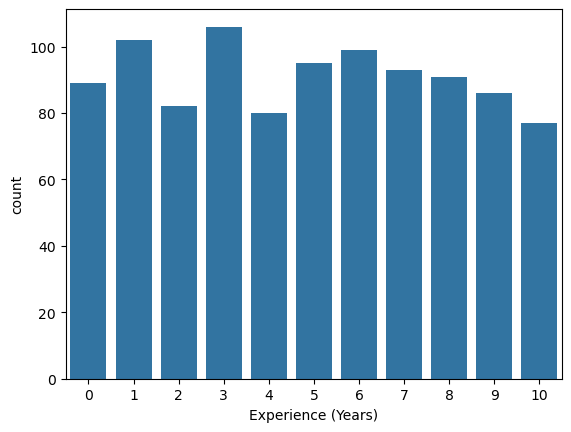

In [4]:
sns.countplot(x=df['Experience (Years)'],data=df)

<Figure size 600x1600 with 0 Axes>

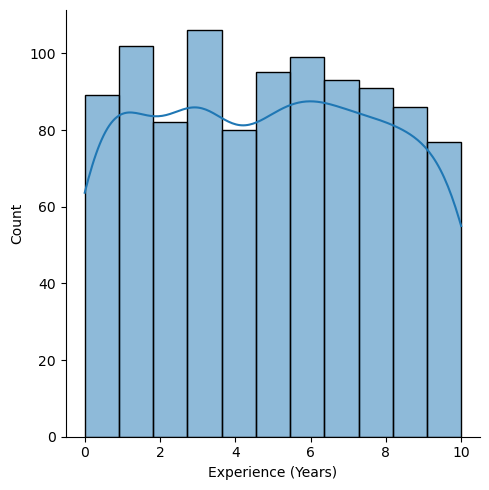

In [5]:
plt.figure(figsize=(6,16))
sns.displot(x=df['Experience (Years)'],kde=True,kind='hist')

#osoby powyzej 4 lat doswiadczenia sa czesciej zatrudniani

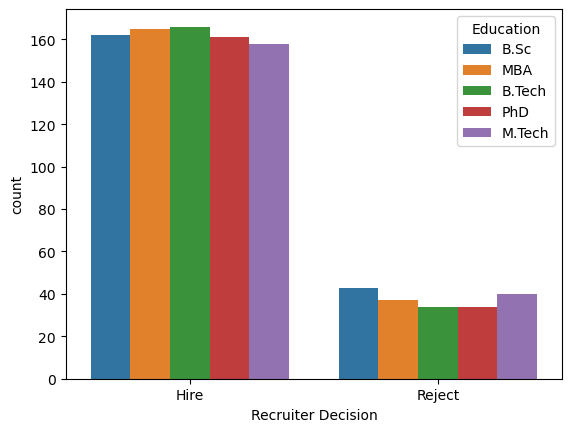

In [6]:
sns.countplot(x=df['Recruiter Decision'],hue=df['Education'])
plt.show()
# wyksztalcenie, decyzja rekrutera 

<Axes: xlabel='Salary Expectation ($)', ylabel='Count'>

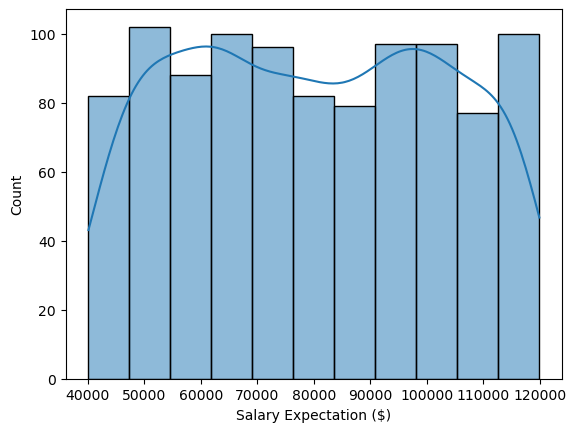

In [7]:
#oczekiwania finasnowe
sns.histplot(data=df['Salary Expectation ($)'],kde=True)

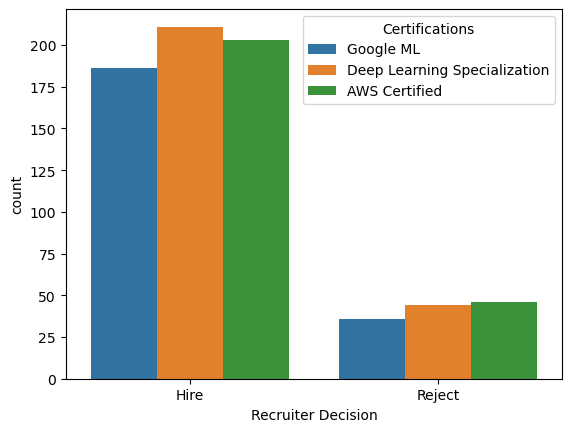

In [8]:
#decyzje rekrutera a posiadanie certyfikaty
sns.countplot(x=df['Recruiter Decision'],hue=df['Certifications'])
plt.show()

In [9]:
a=(df['Skills'].str.get_dummies(sep=','))
df=pd.concat((df,a),axis=1)   

In [10]:
df.drop(columns=['Skills','Name'],inplace=True)

In [11]:
df['Certifications'].value_counts()

Certifications
Deep Learning Specialization    255
AWS Certified                   249
Google ML                       222
Name: count, dtype: int64

In [12]:
df['Certifications'].fillna(method='bfill',inplace=True)

/var/folders/fr/xf8zmfr90fsfv_zpmb43xwb40000gn/T/ipykernel_55277/2202522968.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Certifications'].fillna(method='bfill',inplace=True)
/var/folders/fr/xf8zmfr90fsfv_zpmb43xwb40000gn/T/ipykernel_55277/2202522968.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Certifications'].fillna(method='bfill',inplace=True)


In [13]:
df.isnull().sum()

Resume_ID                 0
Experience (Years)        0
Education                 0
Certifications            0
Job Role                  0
Recruiter Decision        0
Salary Expectation ($)    0
Projects Count            0
AI Score (0-100)          0
 C++                      0
 Cybersecurity            0
 Deep Learning            0
 Ethical Hacking          0
 Java                     0
 Linux                    0
 Machine Learning         0
 NLP                      0
 Networking               0
 Python                   0
 Pytorch                  0
 React                    0
 SQL                      0
 TensorFlow               0
C++                       0
Cybersecurity             0
Deep Learning             0
Ethical Hacking           0
Java                      0
Linux                     0
Machine Learning          0
NLP                       0
Networking                0
Python                    0
Pytorch                   0
React                     0
SQL                 

In [14]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [15]:
for i in df.columns:
    if df[i].dtype =='object' :
       df[i]=label.fit_transform(df[i])

In [16]:
df.drop(columns=['AI Score (0-100)'],inplace=True)
df.to_csv('data_after_filter.csv', index=False)